# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 604
['olonkinbyen', "kapa'a", 'cloverdale', 'hawaiian paradise park', 'hermanus', 'waitangi', 'dalnegorsk', 'grytviken', 'babor - ville', 'quibdo', 'mount pearl', 'albany', 'weno', 'quesnel', 'papatowai', 'urangan', 'tiksi', 'vorgashor', 'saldanha', 'adamstown', 'invercargill', 'orangeburg', "cooper's town", 'atafu village', 'west island', 'jumla', 'yuzhno-kurilsk', 'wailua homesteads', 'georgetown', 'port elizabeth', 'yellowknife', 'verdal', 'kidal', 'la foa', 'ngaoundere', 'port-aux-francais', 'zapala', 'coquimbo', 'constantia', 'kourou', 'cannonvale', 'bamboo flat', 'dudinka', 'udachny', 'lorengau', 'ushuaia', 'moron', 'pangody', 'noshiro', 'kingston', 'piti village', 'anloga', 'lazaro cardenas', 'debre tabor', 'antofagasta', 'boyalik', 'san pedro pochutla', 'makaha', 'richards bay', 'puerto ayora', 'midvagur', 'taiohae', 'puerto san carlos', 'qaqortoq', 'puerto natales', 'mount gambier', 'stanley', 'veraval', 'blackmans bay', 'kavieng', 'vilyuchinsk', 

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all cities
for city in cities:

    # Build url to send request
    city_url = url + "&q=" + city

    # For each of the cities
    try:
        # Send request
        city_weather = requests.get(city_url).json()

        # Receive data from api
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append data to list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # Error handling
    except:
        print("City not found. Skipping...")
              
# Indicate that Data Loading is complete 
print("-------------------------------")
print("Data Retrieval Complete      ")
print("-------------------------------")


Beginning Data Retrieval     
-----------------------------
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
-------------------------------
Data Retrieval Complete      
-------------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64


In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,2.07,73,100,3.96,SJ,1698731100
1,kapa'a,22.0752,-159.3190,26.18,76,40,3.60,US,1698731100
2,cloverdale,38.8055,-123.0172,13.40,58,58,1.31,US,1698731100
3,hawaiian paradise park,19.5933,-154.9731,23.82,94,100,3.09,US,1698731100
4,hermanus,-34.4187,19.2345,15.60,69,23,4.63,ZA,1698731101


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,2.07,73,100,3.96,SJ,1698731100
1,kapa'a,22.0752,-159.3190,26.18,76,40,3.60,US,1698731100
2,cloverdale,38.8055,-123.0172,13.40,58,58,1.31,US,1698731100
3,hawaiian paradise park,19.5933,-154.9731,23.82,94,100,3.09,US,1698731100
4,hermanus,-34.4187,19.2345,15.60,69,23,4.63,ZA,1698731101


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

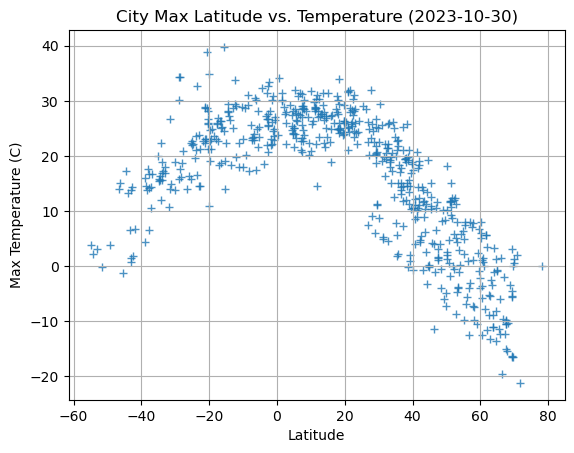

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    linewidths=1,
    marker="+", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties

plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

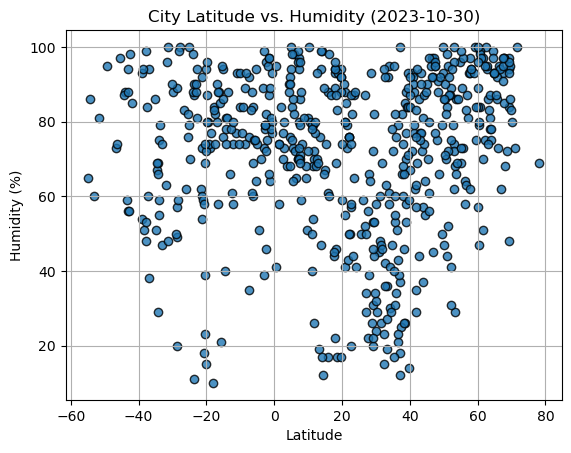

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)


# Incorporate the other graph properties

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

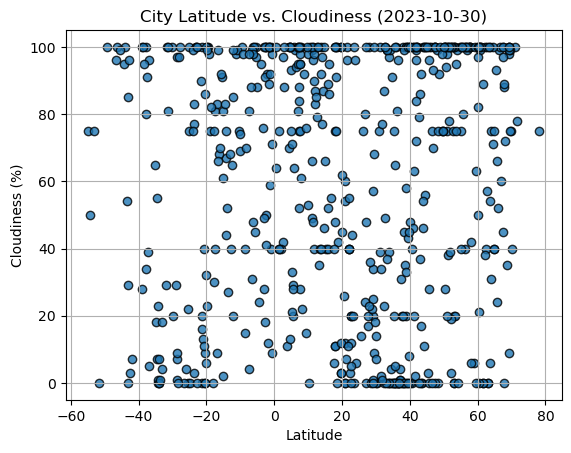

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)


# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

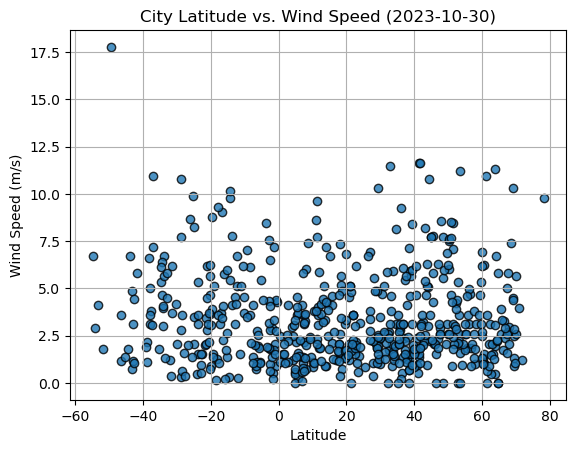

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Wind Speed"],
    edgecolor="black", 
    linewidths=1, 
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("./Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared value is: {rvalue**2}")
    print(f"The r value is: {rvalue}")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0),:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,2.07,73,100,3.96,SJ,1698731100
1,kapa'a,22.0752,-159.3190,26.18,76,40,3.60,US,1698731100
2,cloverdale,38.8055,-123.0172,13.40,58,58,1.31,US,1698731100
3,hawaiian paradise park,19.5933,-154.9731,23.82,94,100,3.09,US,1698731100
6,dalnegorsk,44.5604,135.5701,19.22,55,56,2.24,RU,1698731101


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0),:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,hermanus,-34.4187,19.2345,15.60,69,23,4.63,ZA,1698731101
5,waitangi,-43.9535,-176.5597,13.23,88,100,6.71,NZ,1698731101
7,grytviken,-54.2811,-36.5092,2.12,86,50,2.91,GS,1698731102
14,papatowai,-46.5619,169.4708,13.92,73,96,1.15,NZ,1698731106
15,urangan,-25.3000,152.9000,22.39,76,0,9.87,AU,1698731106


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.7702439576187755
The r value is: -0.8776354354849031


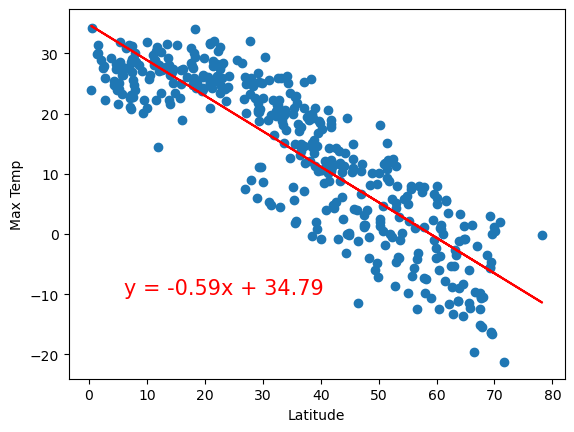

In [16]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6,-10))


The r-squared value is: 0.5026483329084855
The r value is: 0.7089769621845872


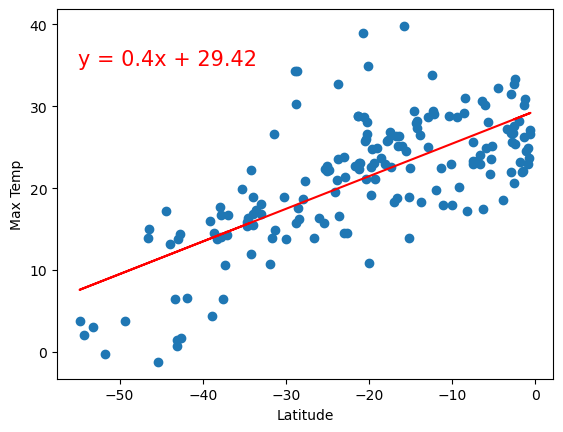

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 35))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The max temperature appears show a strong negative linear relationship with latitudes in the northern hemisphere, with an r-value of -0.86. 
The max temperature appears show a strong positive linear relationship with latitudes in the southern hemisphere, with an r-value of 0.71.

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.0394701228480338
The r value is: 0.19867089079186664


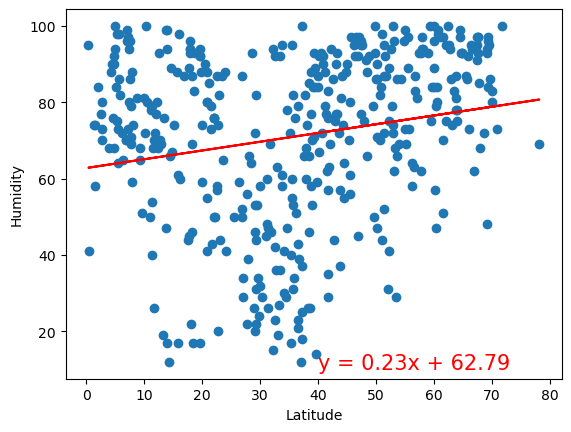

In [18]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(40,10))

The r-squared value is: 0.005924585014519177
The r value is: 0.07697132592413344


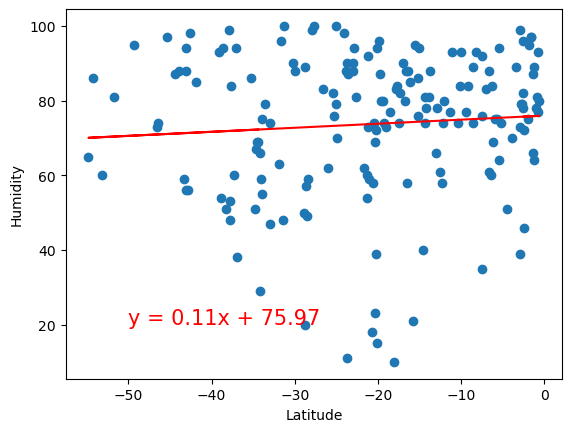

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The data seems to show that the lower the latitude, the less the humidity in both southern and northern hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.0037031476524635515
The r value is: 0.06085349334642631


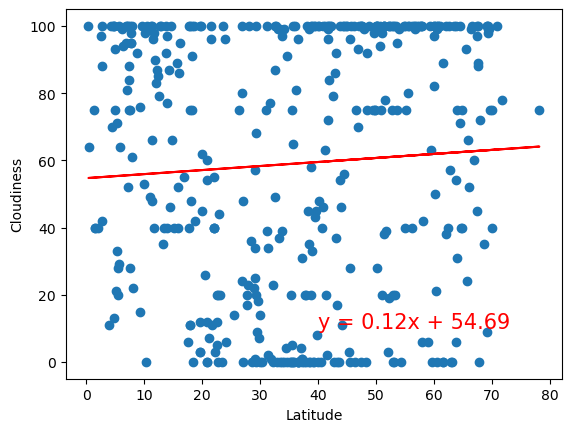

In [20]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,10))

The r-squared value is: 0.03166098923491243
The r value is: 0.17793535127936896


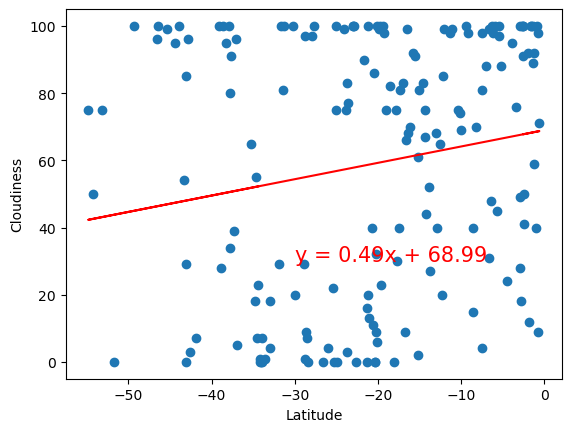

In [21]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The data seems to show that the higher the latitude, the more cloudy it gets in the northern hemisphere.
The data seems to show no relationship between cloudiness and latitude for the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.013685296013418983
The r value is: 0.11698416992661435


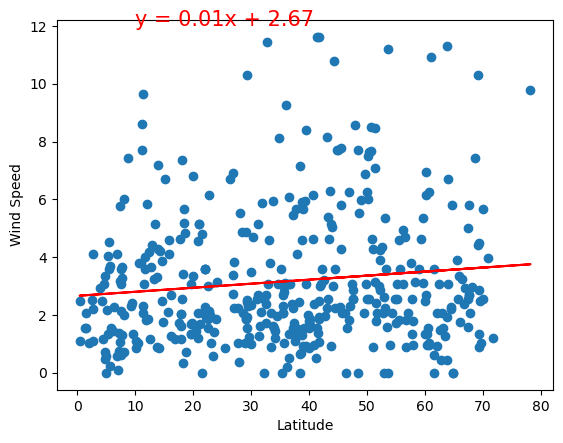

In [22]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,12))

The r-squared value is: 0.020140314241243157
The r value is: -0.141916574934865


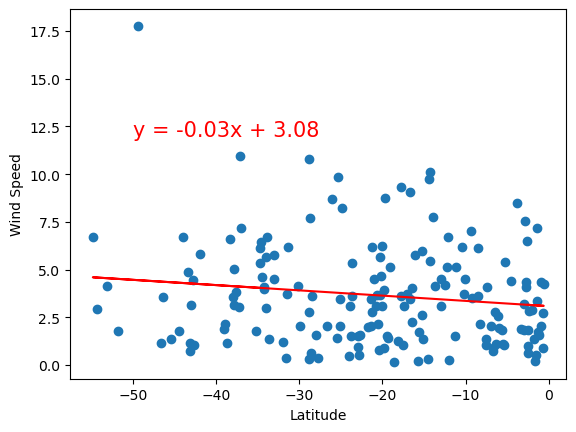

In [23]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 12))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The data seems to show no relationship between wind speed and latitude for both the northern and southern hemisphere.